# Plotting Glider DVL Data with Pandas and Seaborn

In [59]:
import pandas as pd
import seaborn as sns 
import numpy as np
import importlib
import sys
import os
import datetime
from matplotlib import pyplot as plt 

# add parent directory to the path for importing modules 
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import pd0_reader
import PathfinderDVL
import PathfinderEnsemble
import PathfinderTimeSeries
sns.set()

def reload_modules():
    importlib.reload(PathfinderDVL)
    importlib.reload(PathfinderEnsemble)
    importlib.reload(PathfinderTimeSeries)

In [60]:
# # read in a parsed DVL time-series from a .csv file
# #   - the 'pd0_reader.py' parses raw .pd0 files and saves a time-series to .csv format
# #   - use 'index_col' option when reading in csv file 
# #   - use 'parse_dates' to reap the benefits of timestamp indexing
# filepath = "/Users/zduguid/Dropbox (MIT)/MIT-WHOI/Kolumbo cruise 2019/zduguid/pd0-parsed/sentinel/"
# filename = "01820002.csv"
# ts_csv = pd.read_csv(filepath+filename, index_col=0, parse_dates=True)

In [ ]:
reload_modules()
glider   = "sentinel"
# glider   = "unit_770"
unit_name = {"sentinel" : "Unit 250",
             "unit_770" : "Unit 770" }
filepath = "/Users/zduguid/Dropbox (MIT)/MIT-WHOI/Kolumbo cruise 2019/zduguid/pd0-raw/%s/" % (glider)
filename = "01820002.pd0" # example of prime data set to work with
# filename = "01740000.pd0" # example of file not parsing correctly

ts = PathfinderTimeSeries.PathfinderTimeSeries.from_pd0(filepath+filename, save=False)

# ts = pd0_reader.pd0_reader(filepath+filename, save=True)
ts.df.head()

________________________________________
- Parsing New File ---------------------
    input file: /Users/zduguid/Dropbox (MIT)/MIT-WHOI/Kolumbo cruise 2019/zduguid/pd0-raw/sentinel/01820002.pd0


In [43]:
s = "/Users/zduguid/Dropbox (MIT)/MIT-WHOI/Kolumbo cruise 2019/zduguid/pd0-raw/sentinel/ABC.pd0"
root, _, glider, filename = s.rsplit('/',3)
filename = filename.split('.')[0] + '.csv'
print(root + '/' + 'pd0-parsed/' + glider + '/' + filename)

/Users/zduguid/Dropbox (MIT)/MIT-WHOI/Kolumbo cruise 2019/zduguid/pd0-parsed/sentinel/ABC.csv


In [322]:
l = ((1,2,3), ('a','b','c'))
for item in (_[0] for _ in l[1:]):
    print(item)

a


In [ ]:
# l = ['btm_pings_per_ensemble', 'btm_min_correlation_mag', 'btm_min_echo_intensity_amp', 'btm_bottom_track_mode', 'btm_max_error_velocity', 'btm_beam1_range', 'btm_beam2_range', 'btm_beam3_range', 'btm_beam4_range', 'btm_beam1_velocity', 'btm_beam2_velocity', 'btm_beam3_velocity', 'btm_beam4_velocity', 'btm_beam1_correlation', 'btm_beam2_correlation', 'btm_beam3_correlation', 'btm_beam4_correlation', 'btm_beam1_echo_intensity', 'btm_beam2_echo_intensity', 'btm_beam3_echo_intensity', 'btm_beam4_echo_intensity', 'btm_beam1_percent_good', 'btm_beam2_percent_good', 'btm_beam3_percent_good', 'btm_beam4_percent_good', 'btm_ref_layer_min', 'btm_ref_layer_near', 'btm_ref_layer_far', 'btm_beam1_ref_layer_velocity', 'btm_beam2_ref_layer_velocity', 'btm_beam3_ref_layer_velocity', 'btm_beam4_ref_layer_velocity', 'btm_beam1_ref_layer_correlation', 'btm_beam2_ref_layer_correlation', 'btm_beam3_ref_layer_correlation', 'btm_beam4_ref_layer_correlation', 'btm_beam1_ref_layer_echo_intensity', 'btm_beam2_ref_layer_echo_intensity', 'btm_beam3_ref_layer_echo_intensity', 'btm_beam4_ref_layer_echo_intensity', 'btm_beam1_ref_layer_percent_good', 'btm_beam2_ref_layer_percent_good', 'btm_beam3_ref_layer_percent_good', 'btm_beam4_ref_layer_percent_good', 'btm_max_tracking_depth', 'btm_beam1_rssi', 'btm_beam2_rssi', 'btm_beam3_rssi', 'btm_beam4_rssi', 'btm_shallow_water_gain', 'btm_beam1_msb', 'btm_beam2_msb', 'btm_beam3_msb', 'btm_beam4_msb']
s = ['time', 'cpu_firmware_version', 'cpu_firmware_revision', 'system_configuration', 'simulation_flag', 'lag_length', 'num_velocity_beams', 'num_cells', 'pings_per_ensemble', 'depth_cell_length', 'blank_after_transmit', 'profiling_mode', 'low_correlation_threshold', 'num_code_repetitions', 'percent_good_minimum', 'error_velocity_threshold', 'minutes', 'seconds', 'hundredths', 'coordinate_transformation', 'heading_alignment', 'heading_bias', 'sensor_source', 'sensor_available', 'bin_1_distance', 'transmit_pulse_length', 'starting_depth_cell', 'ending_depth_cell', 'false_target_threshold', 'transmit_lag_distance', 'system_bandwidth', 'system_serial_number', 'ensemble_number', 'rtc_year', 'rtc_month', 'rtc_day', 'rtc_hour', 'rtc_minute', 'rtc_second', 'rtc_hundredths', 'ensemble_roll_over', 'bit_result', 'speed_of_sound', 'depth_of_transducer', 'heading', 'pitch', 'roll', 'salinity', 'temperature', 'min_ping_wait_minutes', 'min_ping_wait_seconds', 'min_ping_wait_hundredths', 'heading_standard_deviation', 'pitch_standard_deviation', 'roll_standard_deviation', 'adc_rounded_voltage', 'pressure', 'pressure_variance']
# len(s)
24 + 29 + 1
# len(l) + 29 + 24 + 4*10*4

# fld = 29
# vld = 24
# btm = 54 


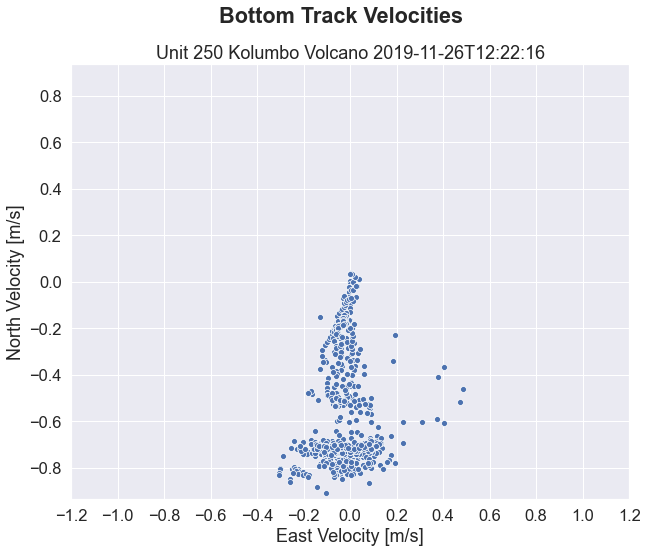

In [297]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=ts.df.btm_beam1_velocity,
                y=ts.df.btm_beam2_velocity,
#                 hue=ts.df.heading,
                data=ts.df)
dt = datetime.datetime.fromtimestamp(ts.df.time[0]).replace(microsecond=0)
plt.axis('equal')
plt.suptitle('Bottom Track Velocities', fontweight='bold')
plt.title('%s Kolumbo Volcano %s' % (unit_name[glider], dt.isoformat(),))
plt.xlabel('East Velocity [m/s]')
plt.ylabel('North Velocity [m/s]')
tick_spacing = np.arange(-1.2,1.4,0.2)
plt.xticks(tick_spacing)
plt.yticks(tick_spacing)
plt.savefig('/Users/zduguid/Desktop/fig/%s/%s_velocity_plot.jpg' % (glider, dt.isoformat()))



In [329]:
t = tuple(["bin%s_beam%s" % (i,j) for i in range(10) for j in range(4)])
t

('bin0_beam0',
 'bin0_beam1',
 'bin0_beam2',
 'bin0_beam3',
 'bin1_beam0',
 'bin1_beam1',
 'bin1_beam2',
 'bin1_beam3',
 'bin2_beam0',
 'bin2_beam1',
 'bin2_beam2',
 'bin2_beam3',
 'bin3_beam0',
 'bin3_beam1',
 'bin3_beam2',
 'bin3_beam3',
 'bin4_beam0',
 'bin4_beam1',
 'bin4_beam2',
 'bin4_beam3',
 'bin5_beam0',
 'bin5_beam1',
 'bin5_beam2',
 'bin5_beam3',
 'bin6_beam0',
 'bin6_beam1',
 'bin6_beam2',
 'bin6_beam3',
 'bin7_beam0',
 'bin7_beam1',
 'bin7_beam2',
 'bin7_beam3',
 'bin8_beam0',
 'bin8_beam1',
 'bin8_beam2',
 'bin8_beam3',
 'bin9_beam0',
 'bin9_beam1',
 'bin9_beam2',
 'bin9_beam3')

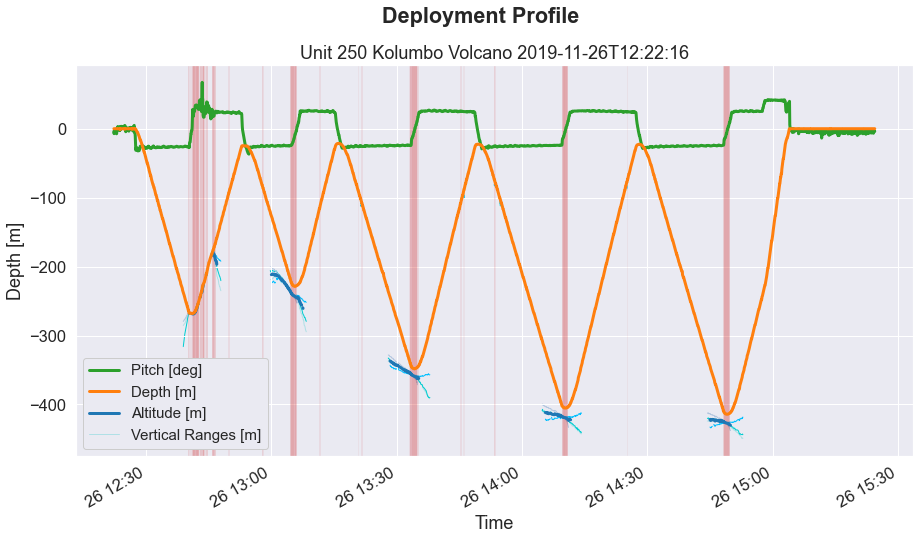

In [300]:
# sub-select time-window
# ts_sub = ts_csv['2019-11-21 22:00':]
ts_sub = ts.df
plot_pitch = True
plot_danger = True

# pitch data
sns.set(font_scale = 1.5)
pitch     = ts_sub['pitch']
if plot_pitch:
    line_plot = pitch.plot(figsize=(15,8), linewidth=3, color='tab:green')

# depth data
depth     = -1 * ts_sub['depth_of_transducer']
line_plot = depth.plot(figsize=(15,8), linewidth=3, color='tab:orange')

# compute altitude estimate from the four vertical range estimates
# - does not account for pitch and roll of the vehicle 
h1 = ts_sub['btm_beam1_range']
h2 = ts_sub['btm_beam2_range']
h3 = ts_sub['btm_beam3_range']
h4 = ts_sub['btm_beam4_range']
altitude = depth - ((h1*h2)/(h1 + h2) + (h3*h4)/(h3 + h4))
altitude.plot(linewidth=3, color='tab:blue', zorder=1)

# bottom_track slant range data 
bt_ranges = ['btm_beam1_range','btm_beam2_range','btm_beam3_range','btm_beam4_range']
bt_colors = ['powderblue', 'darkturquoise', 'lightsteelblue', 'deepskyblue']
for i in range(len(bt_ranges)):
    bt_range  = depth - ts_sub[bt_ranges[i]]
    bt_range.plot(linewidth=1, color=bt_colors[i], zorder=0)

# plot moments in time where the glider gets dangerously close to bottom 
window = 5    # window is used to estimate the time between measurements (not constant during deployment)
danger = 20   # threshold for what is considered dangerously close to the bottom
danger = ts_sub[(ts_sub.btm_beam1_range < danger) & 
                (ts_sub.btm_beam2_range < danger) & 
                (ts_sub.btm_beam3_range < danger) & 
                (ts_sub.btm_beam4_range < danger)]

if plot_danger:
    for time_stamp in danger.index:
        plt.axvspan(time_stamp, time_stamp + pd.Timedelta(seconds=window), color='tab:red', alpha=0.05)
        
# plotting labels 
plt.legend(['Pitch [deg]', 'Depth [m]', 'Altitude [m]', 'Vertical Ranges [m]'], fontsize='small', loc='lower left',framealpha=1)
plt.suptitle('Deployment Profile', fontweight='bold')
plt.title('%s Kolumbo Volcano %s' % (unit_name[glider], dt.isoformat(),))
plt.ylabel('Depth [m]')
plt.xlabel('Time')
plt.savefig('/Users/zduguid/Desktop/fig/%s/%s_profile_plot2.jpg' % (glider, dt.isoformat()))

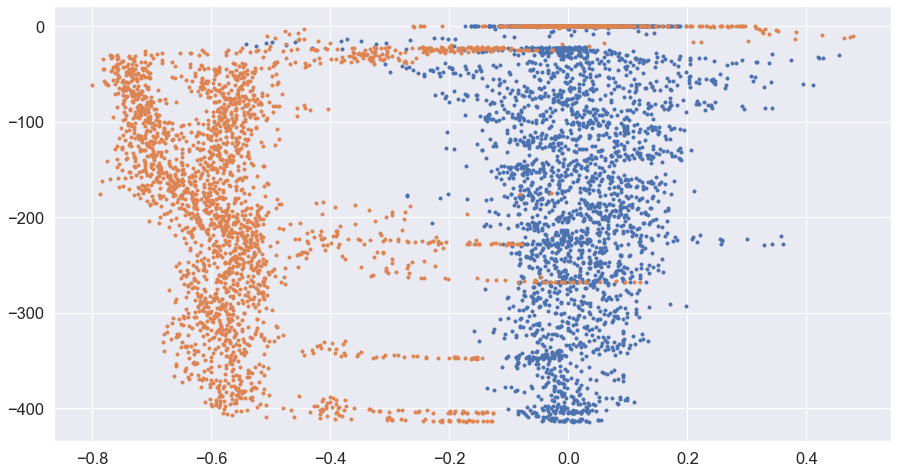

In [295]:
# sns.lineplot(vel_cell1_beam1)
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(15,8))
# ts_sub.vel_cell1_beam1.plot(figsize=(15,8))
# ts_sub.vel_cell1_beam2.plot(figsize=(15,8))
plt.plot(ts_sub.vel_cell1_beam1, -ts_sub.depth_of_transducer, '.')
plt.plot(ts_sub.vel_cell1_beam2, -ts_sub.depth_of_transducer, '.')

# plt.plot(ts_sub.vel_cell11_beam3, -ts_sub.depth_of_transducer)
# sns.lineplot(data=ts_sub, y='depth_of_transducer', x='vel_cell1_beam1', 'o')

# ts_sub.depth_of_transducer.plot(figsize=(15,8))


# ts_sub.vel_cell1_beam3.plot(figsize=(15,8))
# ts_sub.vel_cell1_beam4.plot(figsize=(15,8))
# depth_plot = depth.plot(figsize=(15,8), linewidth=3, color='tab:orange')

# for col in ts_sub.columns:
#     print(col)

In [27]:
# # filter out data from a 20 minute window 
# ts_csv['2019-11-21 21:17:10':'2019-11-21 21:17:30']


# # extract columns of interest
# #  + timestamp displayed by default because the data is time-indexed
# #  + can select the time window that you want to examine
# ts_csv.loc['2019-11-21 21:18', ['pitch','roll']] 


# # example running boolean filter over the time-series 
# #   + filter out values that where all beams are not NaNs 
# #   + is a.isnull() or a.notna() instead of a == np.NaN
# ts_csv[
#     (ts_csv.bt_beam1_velocity.notna()) & 
#     (ts_csv.bt_beam2_velocity.notna()) & 
#     (ts_csv.bt_beam3_velocity.notna()) &
#     (ts_csv.bt_beam4_velocity.notna())
# ]

In [2]:
# parsing time series directly in jupyter notebook allows for access 
importlib.reload(pd0_reader)
# ts = pd0_reader.pd0_reader('pd0-raw/sentinel/A-01820002.pd0', save=False)
ts.coordinate_transformation

print(ts.coordinate_transformation)
print(ts.sensor_source)
print(ts.heading_bias)
print(ts.heading_alignment)

NameError: name 'importlib' is not defined

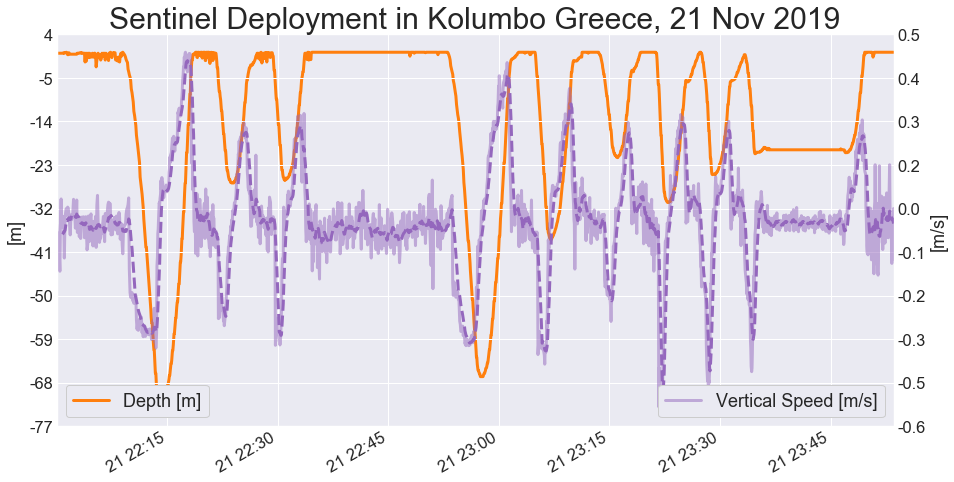

In [172]:
# sub-select time-window
ts_sub=  ts_csv['2019-11-21 22:00':]
pitch =  ts_sub['pitch']
depth = -ts_sub['depth_of_transducer']

# plot depth data
sns.set(font_scale = 1.5)
depth_plot = depth.plot(figsize=(15,8), linewidth=3, color='tab:orange')

# create twin plot and plot beam data 
speed_plot = depth_plot.twinx()
beam3_roll = beam3.rolling(10).mean()
beam3.plot(figsize=(15,8),      linewidth=3, alpha=0.5,  color='tab:purple')
beam3_roll.plot(figsize=(15,8), linewidth=3, style='--', color='tab:purple')

# plotting labels 
depth_plot.legend(['Depth [m]'],            fontsize='medium', loc='lower left',  framealpha=1)
speed_plot.legend(['Vertical Speed [m/s]'], fontsize='medium', loc='lower right', framealpha=1)
plt.title('Sentinel Deployment in Kolumbo Greece, 21 Nov 2019', fontsize=30)
depth_plot.set_ylabel('[m]')
speed_plot.set_ylabel('[m/s]')

# set axis and legend information
depth_plot.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(10))
speed_plot.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(10))
depth_plot.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f'))
speed_plot.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.1f'))
depth_plot.tick_params(axis='both', which='both', length=0)
speed_plot.tick_params(axis='both', which='both', length=0)

# saving the plot
plt.show()
fig = depth_plot.get_figure()
fig.savefig("figs/bottom_track6")